# Atividade 2 : BaO - NPT
- ~100~, ~`300`~, ~500~, ~700~, ~900~, ~1100~, ~1300~, ~1500~ , ~1700~ , ~1900~, 2000 ,~2100~, 2200 ,~2300~, 2400 ,~2500~ 


 extras: 2000,2200,2400

***
> print(data_frames[0].columns[0])

data_frames[0].columns[1]

o primeiro [] representa o dataframe a ser acessado, o segundo indica qual coluna do dataframe a ser acessado, na forma de string "column"



Nesse caso: 

data_frames[0].columns[1] : Acessa o primeiro df (temperatura 20) e a primeira coluna (temperatura)

data_frames[0].columns[0] : Acessa o primeiro df (temperatura 20) e a coluna zero (MD Steps)

data_frames[0].columns[4]

---
> Acessando as colunas da simulação

- .columns[6] --- Volume 

- .columns[1] --- Temperatura

- .columns[0] --- MD steps

- .columns[4] --- Energia

- .columns[5] --- Pressão


---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from scipy.optimize import curve_fit

In [2]:
# plt.rcParams['figure.figsize'] = [10, 4]
plt.style.use('ggplot')
font = {'family': 'serif',
        'weight': 'normal',
        }

Importando os csv's das simulações

In [3]:
df100 = pd.read_csv("npt_100.csv") 
df300 = pd.read_csv("npt_300.csv") 
df500 = pd.read_csv("npt_500.csv") 
df700 = pd.read_csv("npt_700.csv") 
df900 = pd.read_csv("npt_900.csv") 
df1100 = pd.read_csv("npt_1100.csv") 
df1300 = pd.read_csv("npt_1300.csv") 

# 4 Milhões de passos
df1500 = pd.read_csv("NPT_1500.csv") 
df1700 = pd.read_csv("NPT_1700.csv") # feito 24/09/2023 
df1900 = pd.read_csv("NPT_1900.csv") 
df2000 = pd.read_csv("npt_2000.csv") 

df2100 = pd.read_csv("npt_2100.csv") # refazer
df2300 = pd.read_csv("npt_2300.csv") 
df2500 = pd.read_csv("NPT_2500.csv") 


data_frames = [df100, df300, df500, df700, df900, df1100, df1300, df1500, df1700, df1900,df2000, df2100 ,df2300, df2500]
Temperaturas = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2000, 2100 ,2300, 2500]

AttributeError: Line2D.set() got an unexpected keyword argument 'fontdict'

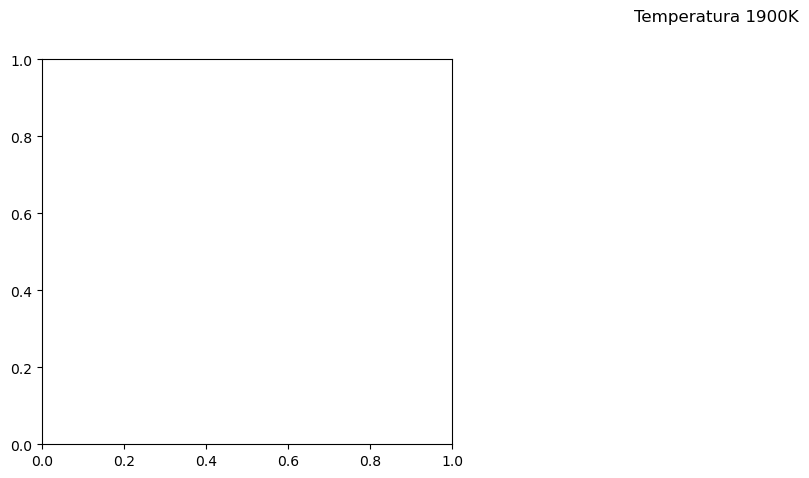

In [8]:
j = 9 # 1900K
cut = 0
plt.figure(figsize=(18,5))
plt.suptitle(f"Temperatura {Temperaturas[j]}K")

# Energia (4)
plt.subplot(1, 3, 1) 
plt.plot( data_frames[j][data_frames[j].columns[0]][cut:] , data_frames[j][data_frames[j].columns[4]][cut:] , fontdict=font)
plt.xlabel("MD Steps")
plt.ylabel("Energia")
plt.title(" Energia vs MD")
plt.grid(True)

# Volume (6)
plt.subplot(1,3,2)
plt.plot( data_frames[j][data_frames[j].columns[0]][cut:] , data_frames[j][data_frames[j].columns[6]][cut:] )
plt.xlabel("MD Steps")
plt.ylabel("Volume")
plt.title("Volume vs MD ")
plt.grid(True)

# Pressao (5)        
plt.subplot(1,3,3)                                                                                         
plt.plot( data_frames[j][data_frames[j].columns[0]][cut:] , data_frames[j][data_frames[j].columns[5]][cut:] )
plt.xlabel("MD Steps")
plt.ylabel("Pressão")
plt.title("Pressão vs MD")
plt.grid(True)
plt.savefig("1900K_NPT")

# Médias Termodinâmicas

####  Mostra todas as simulações:

- Energia $\times$ Temperatura
- Volume $\times$ Temperatura 
- Pressão $\times$ Temperatura

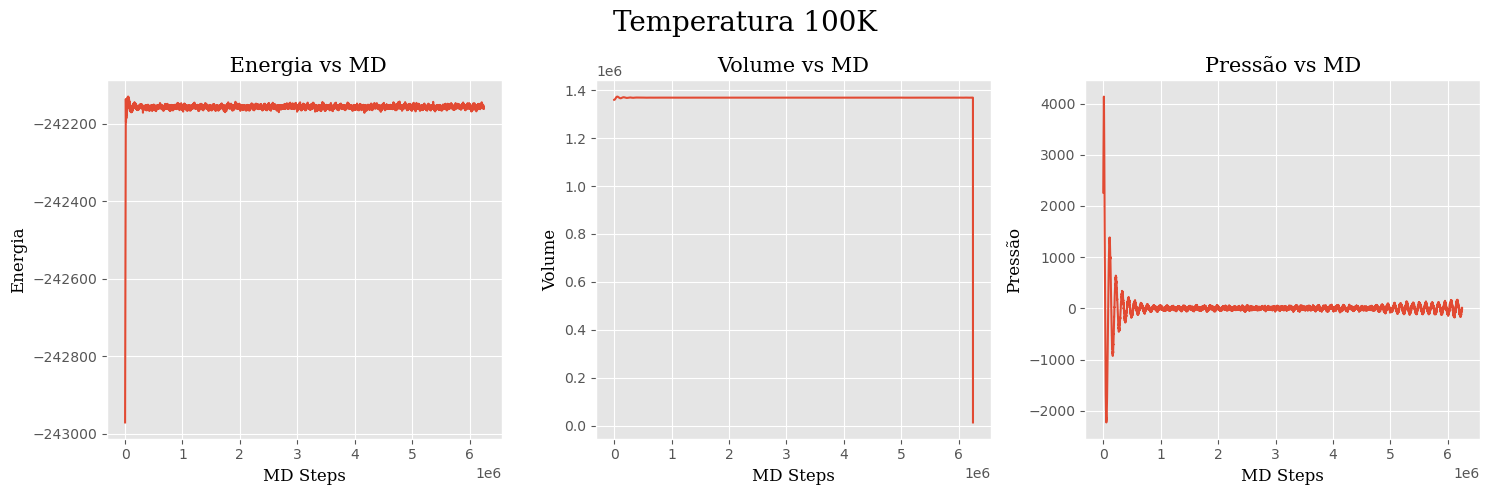

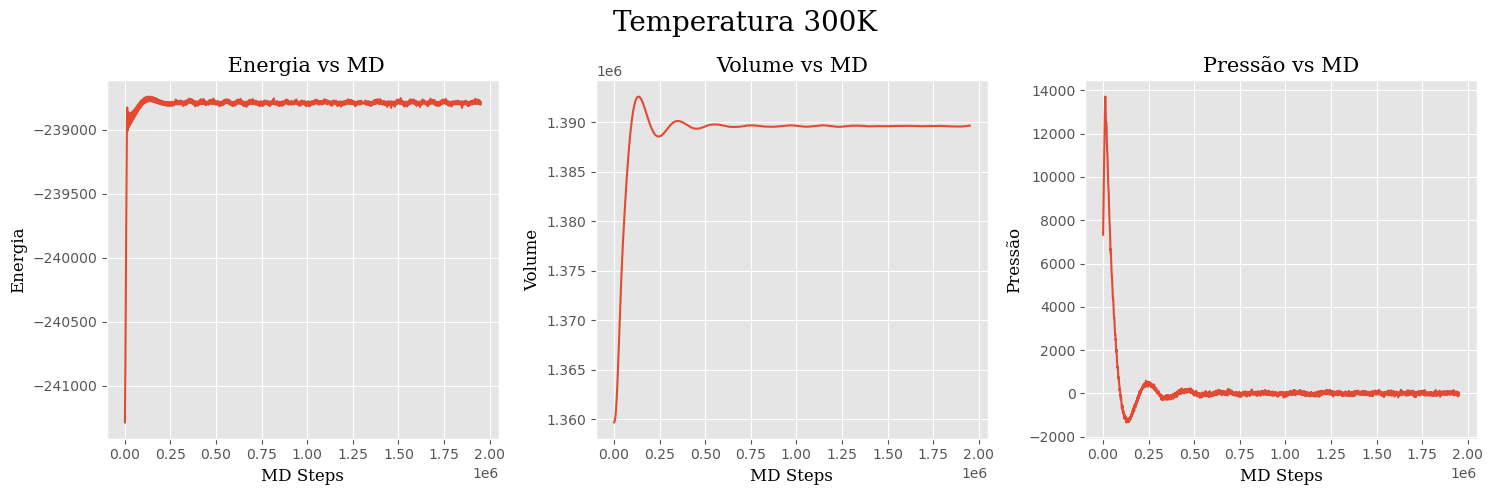

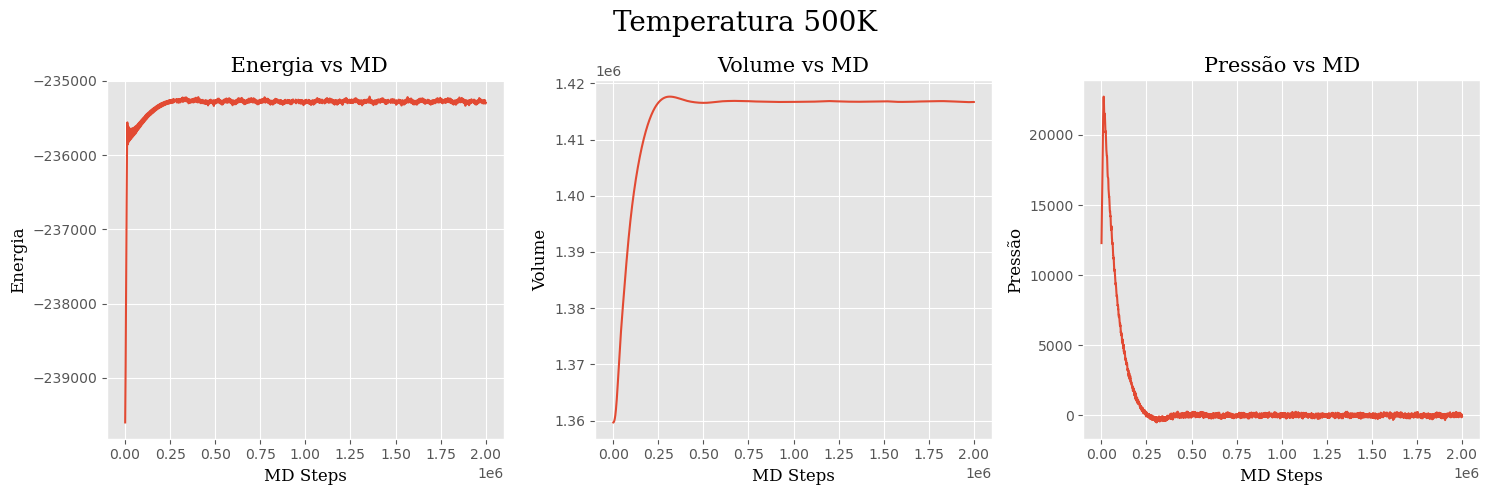

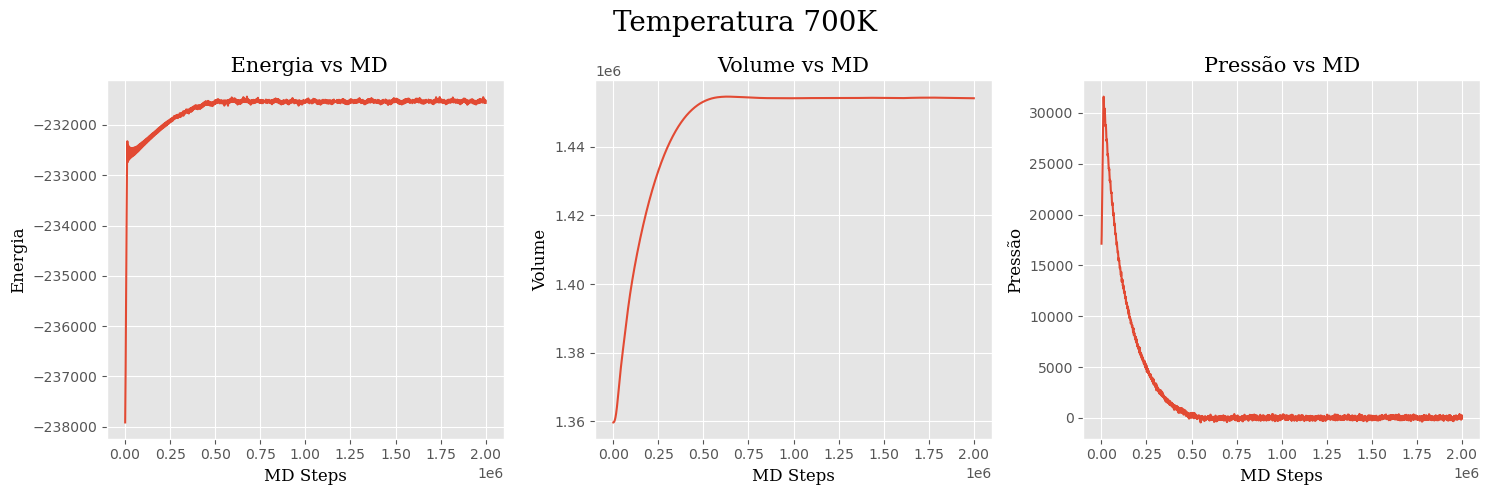

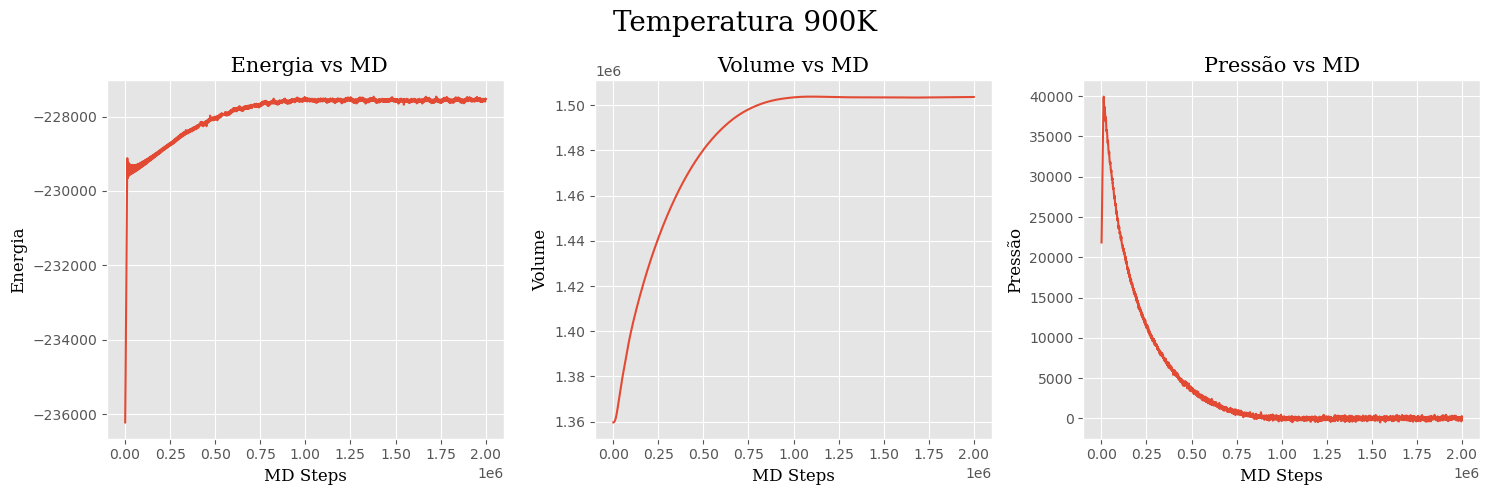

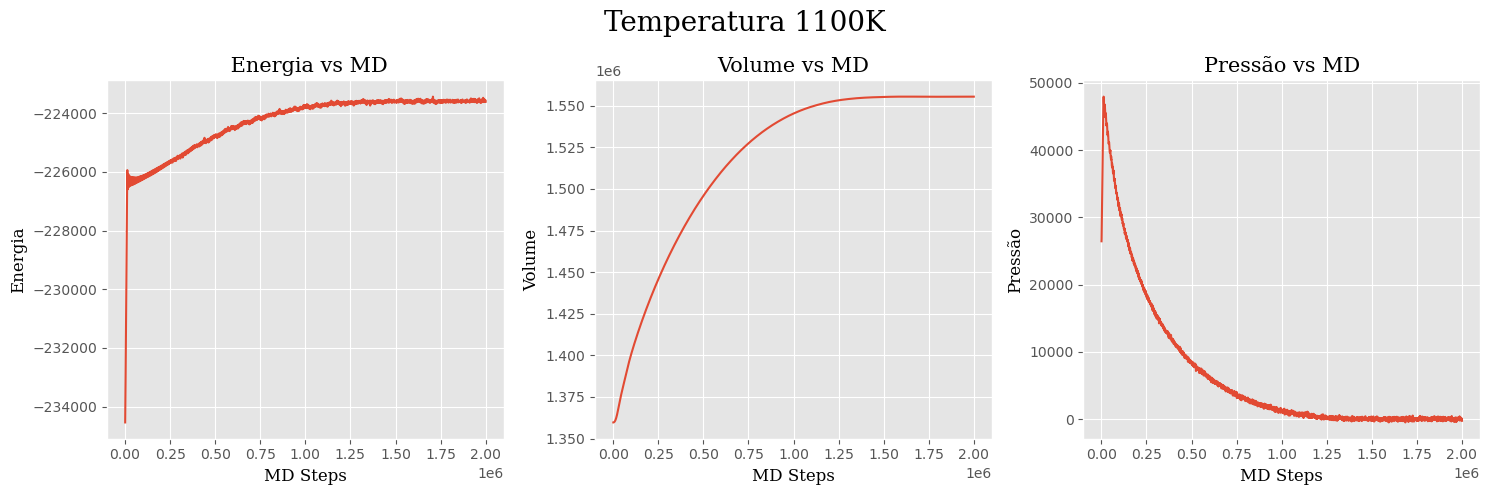

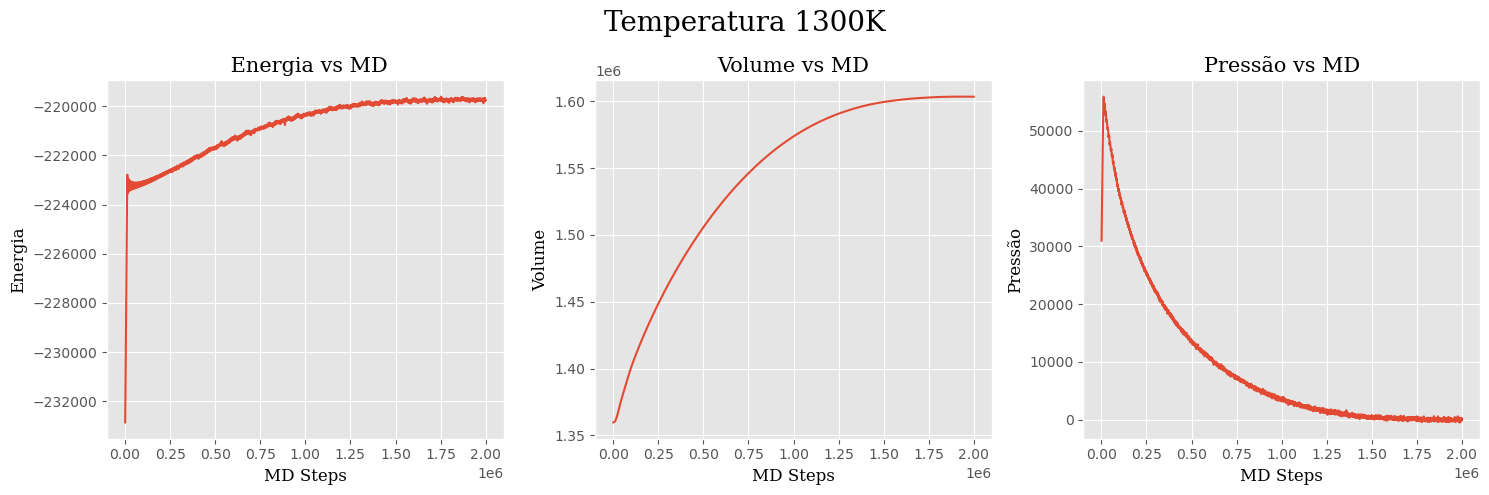

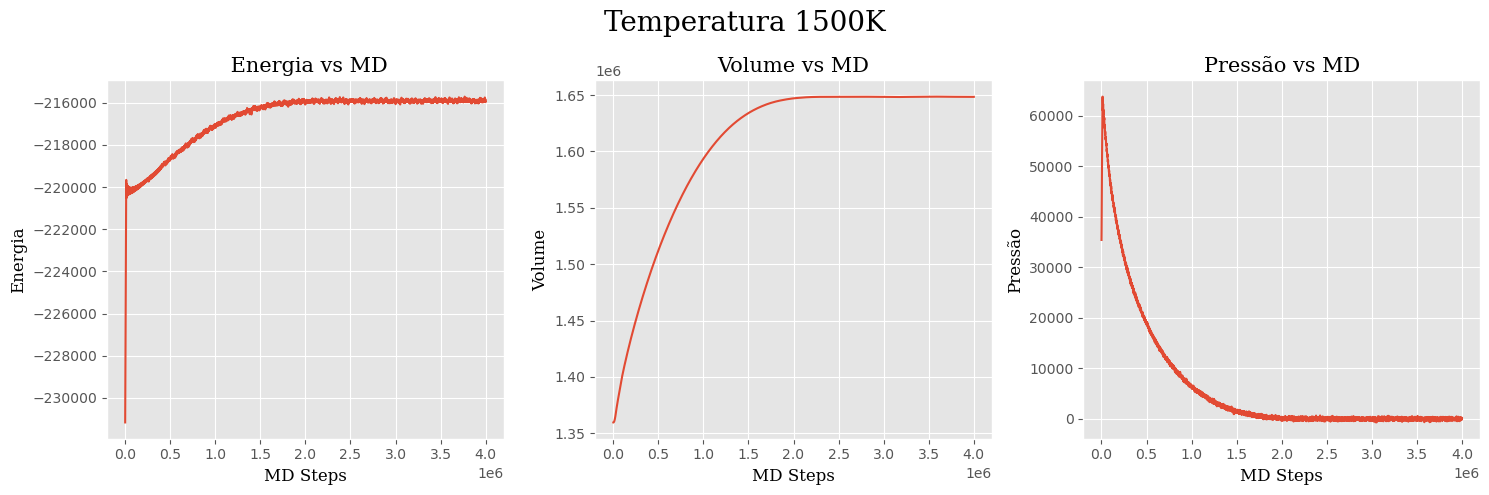

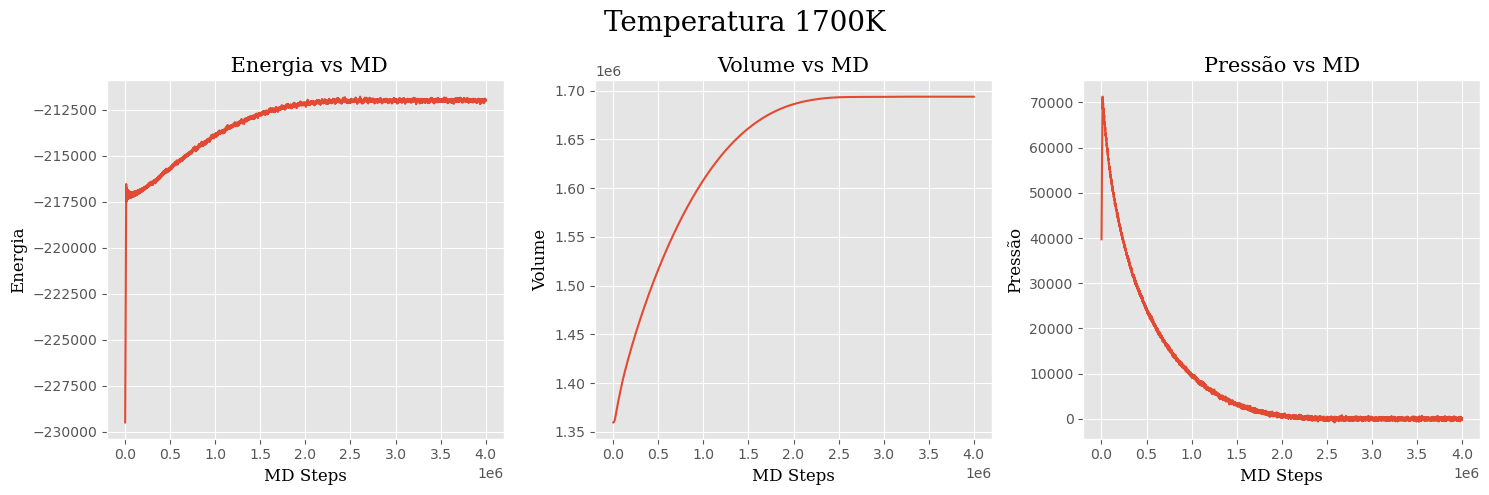

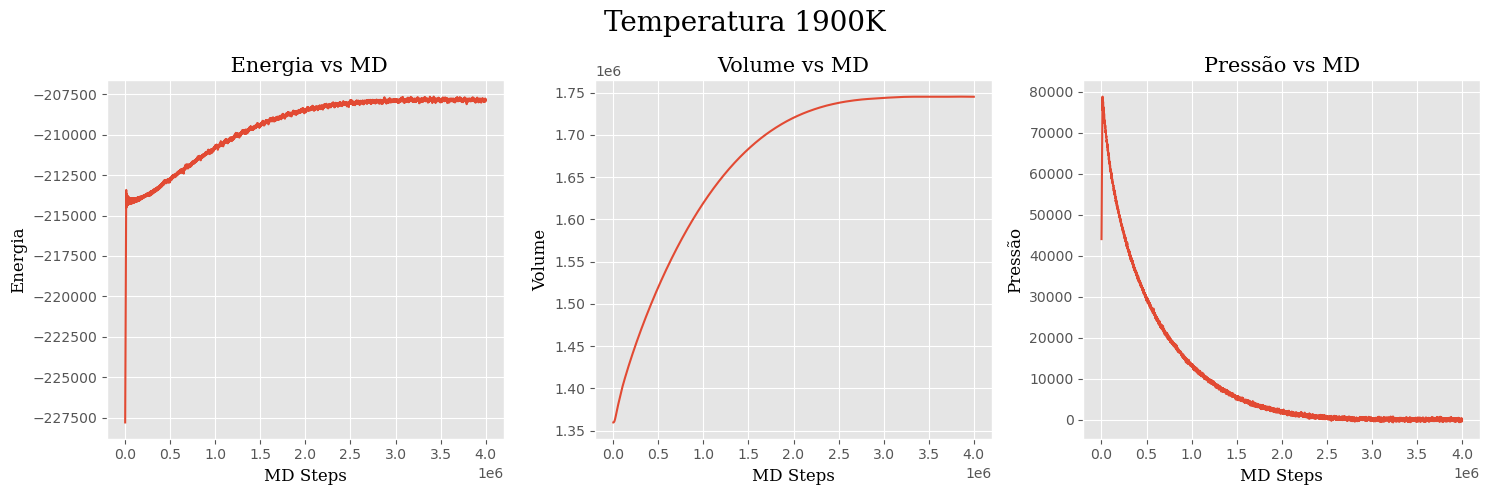

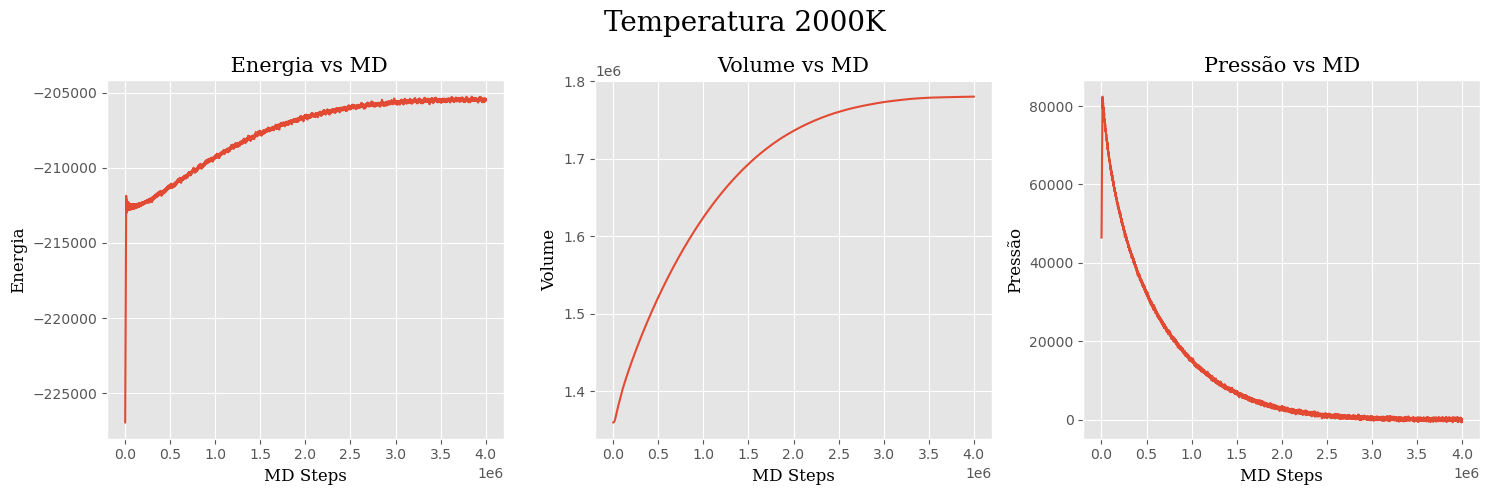

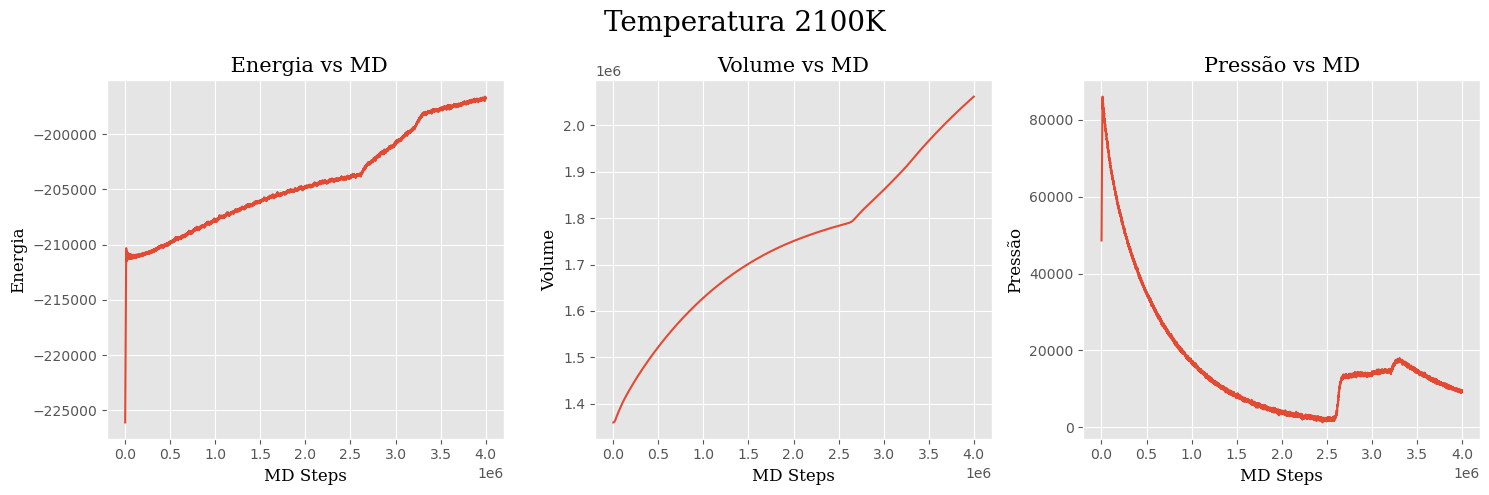

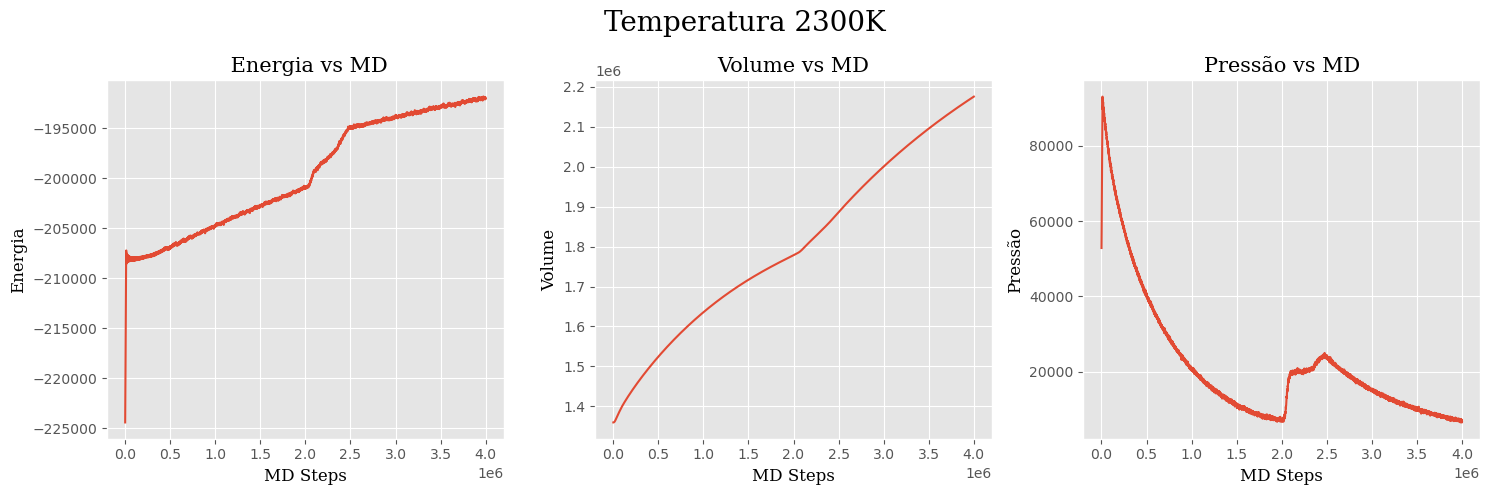

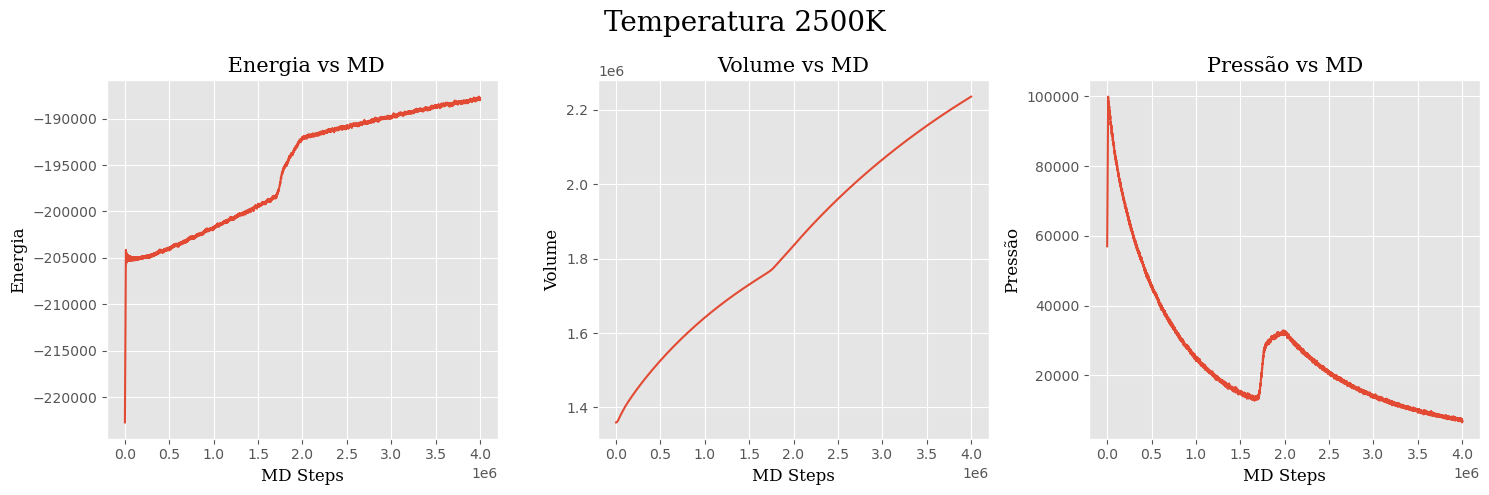

In [25]:

for j in range(len(data_frames)):

    
    plt.figure(figsize=(15,5))
    plt.suptitle(f"Temperatura {Temperaturas[j]}K", fontdict=font, size=20)
    
    # Energia (4)
    plt.subplot(1, 3, 1) 
    plt.plot( data_frames[j][data_frames[j].columns[0]][:] , data_frames[j][data_frames[j].columns[4]][:] )
    plt.xlabel("MD Steps", fontdict=font, color='k', size=12)
    plt.ylabel("Energia", fontdict=font, color='k', size=12)
    plt.title(" Energia vs MD", fontdict=font, color='k', size=15)
    #plt.grid(True)

    # Volume (6)
    plt.subplot(1,3,2)
    plt.plot( data_frames[j][data_frames[j].columns[0]][:] , data_frames[j][data_frames[j].columns[6]][:] )
    plt.xlabel("MD Steps", fontdict=font, size=12, color='k')
    plt.ylabel("Volume", fontdict=font, size=12, color='k')
    plt.title("Volume vs MD", fontdict=font, size=15)
    #plt.grid(True)

    # Pressao (5)        
    plt.subplot(1,3,3)                                                                                         
    plt.plot( data_frames[j][data_frames[j].columns[0]][:] , data_frames[j][data_frames[j].columns[5]][:] )
    plt.xlabel("MD Steps", fontdict=font, size=12, color='k')
    plt.ylabel("Pressão", fontdict=font, size=12, color='k')
    plt.title("Pressão vs MD", fontdict=font, size=15, color='k')
    #plt.grid(True)


    plt.tight_layout() 
    # plt.show()

    nome_arquivo = f'Simulacao_{Temperaturas[j]}K.png'
    #plt.savefig(nome_arquivo)
    #plt.close()

#### Pegando os valores médios

In [204]:
data_frame[data_frame.columns[4]][-1000:]

7000   -188670.49
7001   -188693.87
7002   -188723.17
7003   -188752.10
7004   -188779.12
          ...    
7995   -187904.84
7996   -187974.74
7997   -188016.57
7998   -188004.86
7999   -187939.17
Name: -223139.74, Length: 1000, dtype: float64

In [4]:
energias = []
err_energias = []

temperaturas = []
err_temperaturas = []

volumes = []
err_volumes = []


i = 0
# energia = 4 | volume = 6 | pressao = 5 | temperatura - 1
for data_frame in data_frames:
    cut = -2000 # pega os ultimos 500 mil passos de cada um
    
    energias.append(np.mean(data_frame[data_frame.columns[4]][cut:]))
    err_energias.append(np.std(data_frame[data_frame.columns[4]][cut:]))
    
    
    temperaturas.append(np.mean(data_frame[data_frame.columns[1]][cut:]))
    err_temperaturas.append(np.std(data_frame[data_frame.columns[1]][cut:]))
    
        
    volumes.append(np.mean(data_frame[data_frame.columns[6]][cut:]))
    err_volumes.append(np.std(data_frame[data_frame.columns[1]][cut:]))


`Volume versus Temperatura`

In [5]:
# Função linear para o ajuste
def linear_func(x, m, b):
    return m * x + b

In [6]:
import matplotlib.image as mpimg
img = mpimg.imread(r'C:\Users\bito0\IC (Local)\Fase 1_BaO - LAMMPS\ensemble NPT\Bao-VON.png')
# plt.imshow(img)

A = 222.05951647289854, B = 1316581.8807186736, Vo = 1368016.4767
A/Vo = 1.623223e-04
erro gamma = 2.418906e-04


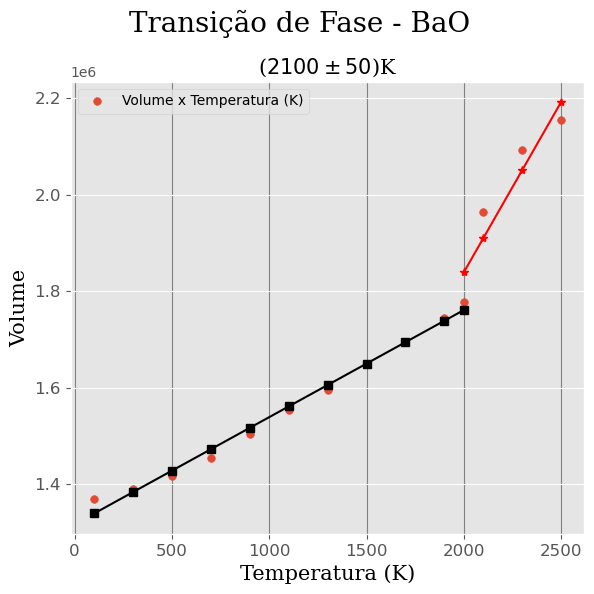

In [9]:
# Volume x Temperatura
plt.figure(figsize=(6,6))
plt.suptitle("Transição de Fase - BaO", size=20, fontdict={'family': 'serif'})
plt.title(r"($2100\pm50$)K", size=15, fontdict=font)
plt.xlabel("Temperatura (K)", size=15, fontdict={'family': 'serif'}, color='k')
plt.ylabel("Volume", size=15, fontdict={'family': 'serif'}, color='k')
plt.xticks([500*i for i in range(6)])


# Plot
plt.scatter(temperaturas, volumes, label='Volume x Temperatura (K)', s=30)
plt.legend()


# Realiza o ajuste linear usando curve_fit
params, covariance = curve_fit(linear_func, np.array(temperaturas[:-3]), np.array(volumes[:-3]))
par2, cov2 = curve_fit(linear_func, np.array(temperaturas[10:]), np.array(volumes[10:]))

# Obtém os parâmetros ajustados
m_fit, b_fit = params
m2_fit, b2_fit = par2

# Criação do gráfico de dispersão e reta ajustada

plt.plot(temperaturas[:-3], linear_func(np.array(temperaturas[:-3]), m_fit, b_fit), 'k',  marker='s')
plt.plot(temperaturas[10:], linear_func(np.array(temperaturas[10:]), m2_fit, b2_fit), 'r', marker='*')

plt.grid(axis='x', c='gray')
plt.legend()
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
print(f"A = {m_fit}, B = {b_fit}, Vo = {volumes[0]}")
print(f"A/Vo = {m_fit/volumes[0]:e}")

print(f"erro gamma = {1/ min(volumes) * np.std(volumes)/ np.std(temperaturas):e}")

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=None,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    nan_policy=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, and each element should be float
    convertible if it is an array like object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None

In [243]:
temperaturas

[99.9980979625,
 299.964548315,
 500.02600918,
 700.0266849199999,
 899.779501035,
 1099.8294665,
 1299.8597898499997,
 1500.0934828,
 1699.73389675,
 1899.5953866499997,
 1999.53596255,
 2099.7188929500003,
 2299.5575282500004,
 2499.8515102]

Após conseguir as outras temperaturas, colocar a média de cada caso em um gráfico de 13 pontos (Emedio, Tmedio)

In [ ]:
E_T = []
E_MD = []

In [ ]:
for index, data_frame in enumerate(data_frames):
    #print(data_frame[data_frame.columns[4]])
    #plt.plot(data_frame[data_frame.columns[4]], data_frame[data_frame.columns[1]])
    
    #E_T.append( [ data_frame[data_frame.columns[4]] , data_frame[data_frame.columns[1]] ] )
    # últimos passos
    E_T.append( [ data_frame[data_frame.columns[4]][3960:]  , data_frame[data_frame.columns[1]][3960:] ] )
    E_MD.append( [ data_frame[data_frame.columns[4]][:]  , data_frame[data_frame.columns[0]][:] ] )
    
    #E_MD.append( [ data_frame[data_frame.columns[4]][3960:]  , data_frame[data_frame.columns[0]][3960:] ] )
    
    #E_MD.append( [ data_frame[data_frame.columns[4]][:]  , data_frame[data_frame.columns[0]][:] ] )
    
    
    #print(index)

In [ ]:
#print(E_T[0])
# E_T[simulacao][0-1] : 0 é energia, 1 temperatura
#plt.scatter(E_T[0][1], E_T[0][0])

In [ ]:
# E_T[nº da simulação][0-1] : 0 é energia 1 é temperatura
plt.figure(figsize=(20,20))
plt.tight_layout()
titles = ["Energia vs Temperatura"]
nrows , ncols = 4, 4

for i in range(16):
    axes_i = plt.subplot(nrows, ncols, i+1)
    axes_i.scatter(E_T[i][1], E_T[i][0])
    axes_i.set_title(f"{titles[0]} : {Temperaturas[i]}K")
    axes_i.set_xlabel("Temperatura")
    axes_i.set_ylabel("Energia")
#plt.savefig('test2.png')

In [ ]:
plt.figure(figsize=(20, 10) )
plt.tight_layout()
titles = ["Energia vs MD Steps"]
nrows , ncols = 2, 2

for i in range(4):
    axes_i = plt.subplot(nrows, ncols, i+1)
    axes_i.scatter(E_MD[i][1], E_MD[i][0])
    axes_i.set_title(f"{titles[0]} : {Temperaturas[i]}K")
    axes_i.set_xlabel("Passos")
    axes_i.set_ylabel("Energia")
    axes_i.grid()
    

plt.savefig('image_20a500.png')

In [ ]:
for j in range(len(data_frames)):


    plt.figure(figsize=(15,5))
    plt.suptitle(f"Temperatura {Temperaturas[j]}K")
    # Energia (4)
    plt.subplot(1, 3, 1) 
    plt.plot( data_frames[j][data_frames[j].columns[0]][:4000] , data_frames[j][data_frames[j].columns[4]][:4000] )
    plt.xlabel("MD Steps")
    plt.ylabel("Energia")
    plt.title(" Energia vs MD")
    plt.grid(True)

    # Volume (6)
    plt.subplot(1,3,2)
    plt.plot( data_frames[j][data_frames[j].columns[0]][:4000] , data_frames[j][data_frames[j].columns[6]][:4000] )
    plt.xlabel("MD Steps")
    plt.ylabel("Volume")
    plt.title("Volume vs MD ")
    plt.grid(True)

    # Pressao (5)        
    plt.subplot(1,3,3)                                                                                         
    plt.plot( data_frames[j][data_frames[j].columns[0]][:4000] , data_frames[j][data_frames[j].columns[5]][:4000] )
    plt.xlabel("MD Steps")
    plt.ylabel("Pressão")
    plt.title("Pressão vs MD")
    plt.grid(True)


    plt.tight_layout() 
    # plt.show()

    nome_arquivo = f'Simulacao_{Temperaturas[j]}K.png'
    plt.savefig(nome_arquivo)
    plt.close()

Médias Termodinâmicas
Ajuste linear para parâmetros termodinâmicos

# teste de subplots

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.tight_layout()
titles = ["Energia vs Temperatura"]
fig.suptitle("Médias Termodinâmicas")
nrows , ncols = 3, 3

for i in range(len(data_frames)):
    
    output_termos = ["Energia", "Volume", "Pressao", ]
    axes_i = plt.subplot(nrows, ncols, i+1)
    axes_i.plot(data_frames[i][data_frames[i].columns[0]][:] , data_frames[i][data_frames[i].columns[5]][:] )
    axes_i.plot(data_frames[i][data_frames[i].columns[0]][:] , data_frames[i][data_frames[i].columns[6]][:] )
    axes_i.plot(data_frames[i][data_frames[i].columns[0]][:] , data_frames[i][data_frames[i].columns[4]][:] )
    
    
    
    
    
    
    #axes_i.set_title(f"{titles[0]} : {Temperaturas[i]}K")
    #axes_i.set_xlabel("Temperatura")
    #axes_i.set_ylabel()
#plt.savefig('test2.png')

In [ ]:
output_termos = {"Energia": 4, "Volume": 6, "Pressao": 5 }
print(output_termos["Pressao"])

#.columns[6] --- Volume
#.columns[1] --- Temperatura
#.columns[0] --- MD steps
#.columns[4] --- Energia
#columns[5] --- Pressao

output_termos["Pressao"]

# 0, 4 == energia vs md 
# 0, 6 == volume vs md
# 0 , 5 == pressao vs md


In [ ]:
plt.subplot?

Mostrar todas simulações: *Energia, Volume e Pressão versus MD steps*